In [4]:
#install requirements
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#connect to database

from dejavu import Dejavu

config = {
    "database_type": "mysql",
    "database": {
        "host": "127.0.0.1",
        "user": "root",
        "password": "CookieYumYum", 
        "database": "dejavu",
    }
}

djv = Dejavu(config)

In [7]:
#importing directory of footfall audio data 
djv.fingerprint_directory("/Users/allegrasimmons/Downloads/Walking_Audio_Files", [".mp3"], 3)

/Users/allegrasimmons/Downloads/Walking_Audio_Files/Allegra - walkinghallwayrunningshoes/Allegra-walkinghallwayrunningshoes20.mp3 already fingerprinted, continuing...
/Users/allegrasimmons/Downloads/Walking_Audio_Files/Allegra - walkinghallwayrunningshoes/Allegra-walkinghallwayrunningshoes19.mp3 already fingerprinted, continuing...
/Users/allegrasimmons/Downloads/Walking_Audio_Files/Allegra - walkinghallwayrunningshoes/Allegra-walkinghallwayrunningshoes18.mp3 already fingerprinted, continuing...
/Users/allegrasimmons/Downloads/Walking_Audio_Files/Allegra - walkinghallwayrunningshoes/Allegra-walkinghallwayrunningshoes2.mp3 already fingerprinted, continuing...
/Users/allegrasimmons/Downloads/Walking_Audio_Files/Allegra - walkinghallwayrunningshoes/Allegra-walkinghallwayrunningshoes3.mp3 already fingerprinted, continuing...
/Users/allegrasimmons/Downloads/Walking_Audio_Files/Allegra - walkinghallwayrunningshoes/Allegra-walkinghallwayrunningshoes1.mp3 already fingerprinted, continuing...
/

In [10]:
#nowtryingtorecongizenotfingerprintedaudios

from dejavu.logic.recognizer.file_recognizer import FileRecognizer
recognizer = FileRecognizer(djv)

In [11]:
#number of fingerprints from footfall directory
print(djv.db.get_num_fingerprints())

52728


In [13]:
#using the recoongize() function to recongize some of the footfall data 
#picking each of the types of footfalls, to see if dejavu can recongize it 
#recongizing running shoes 
first_foot = djv.recognize(FileRecognizer, "/Users/allegrasimmons/Downloads/Walking_Audio_Files/Allegra - boots/Allegra-walkinghallwayrunningshoes1.mp3")
first_foot

{'total_time': 0.07232522964477539,
 'fingerprint_time': 0.026253938674926758,
 'query_time': 0.03451824188232422,
 'align_time': 0.011482000350952148,
 'results': [{'song_id': 5,
   'song_name': b'Allegra-walkinghallwayrunningshoes1',
   'input_total_hashes': 50,
   'fingerprinted_hashes_in_db': 50,
   'hashes_matched_in_input': 50,
   'input_confidence': 1.0,
   'fingerprinted_confidence': 1.0,
   'offset': 0,
   'offset_seconds': 0.0,
   'file_sha1': b'45EDFAD4B3635291CB7D5849A43179F4833B91C2'},
  {'song_id': 33,
   'song_name': b'Allegra-walkinghallwayrunningshoes',
   'input_total_hashes': 50,
   'fingerprinted_hashes_in_db': 1498,
   'hashes_matched_in_input': 109,
   'input_confidence': 2.18,
   'fingerprinted_confidence': 0.07,
   'offset': 0,
   'offset_seconds': 0.0,
   'file_sha1': b'7CF913D9E7BF8D1D4AC7A3F373304269209B8D8B'}]}

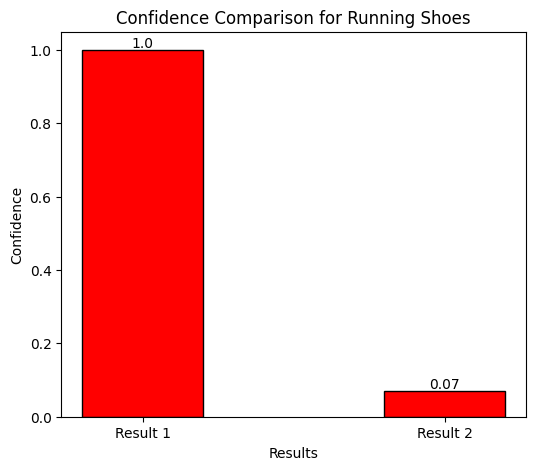

In [23]:
data = {'Result 1': 1.0, 'Result 2': 0.07}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Running Shoes')

plt.show()

In [14]:
#walking barefoot

second_foot = djv.recognize(FileRecognizer, "/Users/allegrasimmons/Downloads/Walking_Audio_Files/Allegra - walkingbarefoot/Allegra- walkinghallwaybarefoot5.mp3")
second_foot

{'total_time': 0.2000141143798828,
 'fingerprint_time': 0.03995394706726074,
 'query_time': 0.1482410430908203,
 'align_time': 0.011408090591430664,
 'results': [{'song_id': 49,
   'song_name': b'Allegra- walkinghallwaybarefoot5',
   'input_total_hashes': 34,
   'fingerprinted_hashes_in_db': 34,
   'hashes_matched_in_input': 34,
   'input_confidence': 1.0,
   'fingerprinted_confidence': 1.0,
   'offset': 0,
   'offset_seconds': 0.0,
   'file_sha1': b'091BC3C35236599519E6800A5387FDD40AECCABF'},
  {'song_id': 66,
   'song_name': b'Allegra- walkinghallwaybarefoot',
   'input_total_hashes': 34,
   'fingerprinted_hashes_in_db': 1526,
   'hashes_matched_in_input': 45,
   'input_confidence': 1.32,
   'fingerprinted_confidence': 0.03,
   'offset': 903,
   'offset_seconds': 41.93524,
   'file_sha1': b'F539C0C94BDD5492DA3B419EABAEE4278257C5CD'}]}

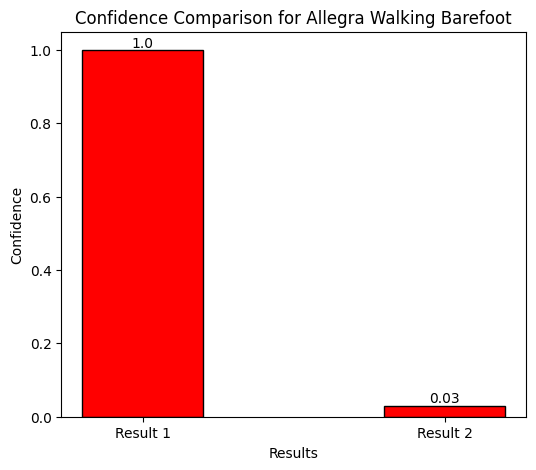

In [41]:
data = {'Result 1': 1.0, 'Result 2': 0.03}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Allegra Walking Barefoot')

plt.show()

In [15]:
#walking in sneakers 

third_foot = djv.recognize(FileRecognizer, "/Users/allegrasimmons/Downloads/Walking_Audio_Files/Allegra - sneakers/Allegra - walkinghallwaysneakers11.mp3")
third_foot

{'total_time': 0.1868879795074463,
 'fingerprint_time': 0.03560185432434082,
 'query_time': 0.1373310089111328,
 'align_time': 0.013260126113891602,
 'results': [{'song_id': 67,
   'song_name': b'Allegra - walkinghallwaysneakers11',
   'input_total_hashes': 94,
   'fingerprinted_hashes_in_db': 94,
   'hashes_matched_in_input': 94,
   'input_confidence': 1.0,
   'fingerprinted_confidence': 1.0,
   'offset': 0,
   'offset_seconds': 0.0,
   'file_sha1': b'993A373345CE40BF4945DBE684780024DD3722F2'},
  {'song_id': 52,
   'song_name': b'Allegra- walkinghallwaybarefoot7',
   'input_total_hashes': 94,
   'fingerprinted_hashes_in_db': 30,
   'hashes_matched_in_input': 5,
   'input_confidence': 0.05,
   'fingerprinted_confidence': 0.17,
   'offset': -28,
   'offset_seconds': -1.30032,
   'file_sha1': b'1566B02323732B7F2F0D424CFEBF318052566759'}]}

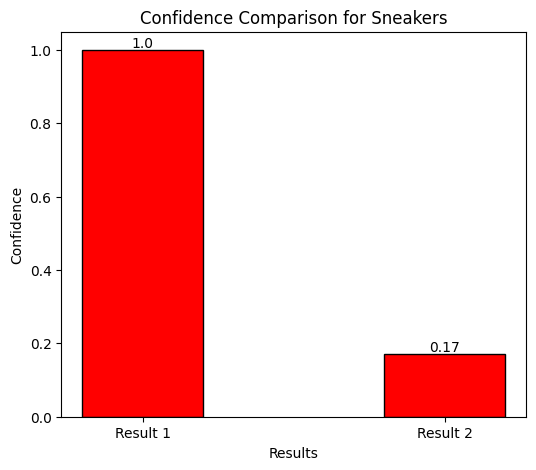

In [40]:
data = {'Result 1': 1.0, 'Result 2': 0.17}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Sneakers')

plt.show()

In [16]:
#walking in flip flops 

fourth_foot = djv.recognize(FileRecognizer, "/Users/allegrasimmons/Downloads/Walking_Audio_Files/Allegra - flipflops/Allegra - walkinghallwayinflipflops7.mp3")
fourth_foot

{'total_time': 0.07455897331237793,
 'fingerprint_time': 0.024260997772216797,
 'query_time': 0.03250384330749512,
 'align_time': 0.01771688461303711,
 'results': [{'song_id': 122,
   'song_name': b'Allegra - walkinghallwayinflipflops7',
   'input_total_hashes': 106,
   'fingerprinted_hashes_in_db': 106,
   'hashes_matched_in_input': 106,
   'input_confidence': 1.0,
   'fingerprinted_confidence': 1.0,
   'offset': 0,
   'offset_seconds': 0.0,
   'file_sha1': b'4836A0A7D4621D47AA80AFDEB1DF36B3A2391E98'},
  {'song_id': 44,
   'song_name': b'Allegra- walkinghallwaybarefoot9',
   'input_total_hashes': 106,
   'fingerprinted_hashes_in_db': 30,
   'hashes_matched_in_input': 4,
   'input_confidence': 0.04,
   'fingerprinted_confidence': 0.13,
   'offset': 55,
   'offset_seconds': 2.5542,
   'file_sha1': b'F8017E5EB20E53EC7CD40FB3346B8A58A41D7805'}]}

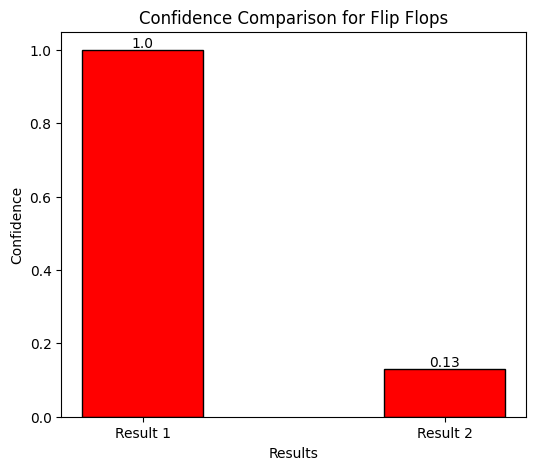

In [39]:
data = {'Result 1': 1.0, 'Result 2': 0.13}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Flip Flops')

plt.show()

In [17]:
# walking in boots 

fifth_foot = djv.recognize(FileRecognizer, "/Users/allegrasimmons/Downloads/Walking_Audio_Files/Allegra - boots/Allegra- walkinghallwayboots18.mp3")
fifth_foot

{'total_time': 0.07125616073608398,
 'fingerprint_time': 0.023595809936523438,
 'query_time': 0.03610587120056152,
 'align_time': 0.011483907699584961,
 'results': [{'song_id': 22,
   'song_name': b'Allegra- walkinghallwayboots18',
   'input_total_hashes': 162,
   'fingerprinted_hashes_in_db': 162,
   'hashes_matched_in_input': 162,
   'input_confidence': 1.0,
   'fingerprinted_confidence': 1.0,
   'offset': 0,
   'offset_seconds': 0.0,
   'file_sha1': b'6C896A055638E72A80B626B499018A59794B0FDF'},
  {'song_id': 21,
   'song_name': b'Allegra- walkinghallwayboots19',
   'input_total_hashes': 162,
   'fingerprinted_hashes_in_db': 202,
   'hashes_matched_in_input': 4,
   'input_confidence': 0.02,
   'fingerprinted_confidence': 0.02,
   'offset': -5,
   'offset_seconds': -0.2322,
   'file_sha1': b'1EF4AB0E64CC0530551FCB26CABAB3F0DFF45ABC'}]}

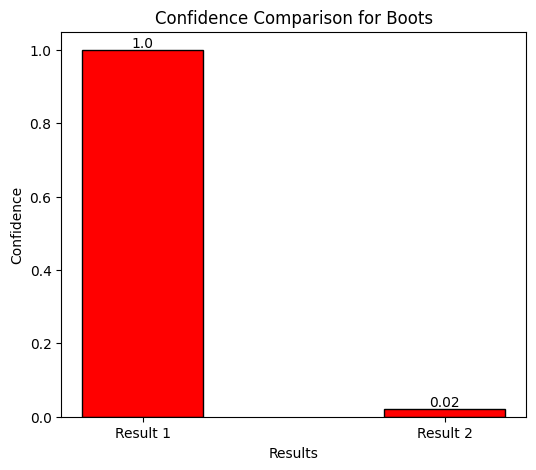

In [38]:
data = {'Result 1': 1.0, 'Result 2': 0.02}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Boots')

plt.show()

In [32]:
# nathaniel walking barefoot

sixth_foot = djv.recognize(FileRecognizer, "/Users/allegrasimmons/Downloads/Walking_Audio_Files/Nathaniel - walkingbarefoot/8-nathaniel-walkingbarefootinhallway.mp3")
sixth_foot

{'total_time': 0.06462430953979492,
 'fingerprint_time': 0.028983116149902344,
 'query_time': 0.0195767879486084,
 'align_time': 0.015990018844604492,
 'results': [{'song_id': 96,
   'song_name': b'8-nathaniel-walkingbarefootinhallway',
   'input_total_hashes': 46,
   'fingerprinted_hashes_in_db': 46,
   'hashes_matched_in_input': 46,
   'input_confidence': 1.0,
   'fingerprinted_confidence': 1.0,
   'offset': 0,
   'offset_seconds': 0.0,
   'file_sha1': b'557AA2731B618B541FD347C8CA3FFE17AF7797D3'},
  {'song_id': 78,
   'song_name': b'Allegra - walkinghallwaysneakers3',
   'input_total_hashes': 46,
   'fingerprinted_hashes_in_db': 50,
   'hashes_matched_in_input': 9,
   'input_confidence': 0.2,
   'fingerprinted_confidence': 0.18,
   'offset': 0,
   'offset_seconds': 0.0,
   'file_sha1': b'D55908A8A093046F3D7E77384127A2F8C680E855'}]}

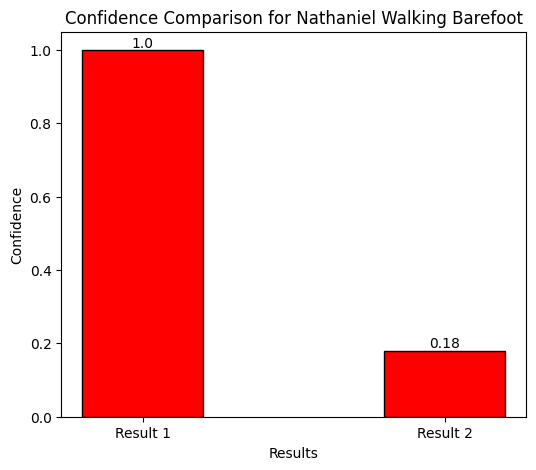

In [37]:
data = {'Result 1': 1.0, 'Result 2': 0.18}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Nathaniel Walking Barefoot')

plt.show()

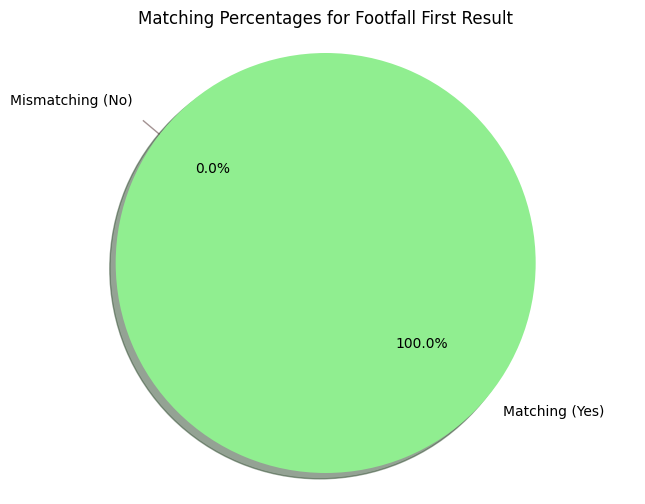

In [3]:
footfall_list = [
    {'Audio': 'Running Shoes', 'First': 'yes', 'Second': 'yes'},
    {'Audio': 'Barefoot', 'First': 'yes', 'Second': 'yes'},
    {'Audio': 'Sneakers', 'First': 'yes', 'Second': 'no'},
    {'Audio': 'Flip Flops', 'First': 'yes', 'Second': 'no'},
    {'Audio': 'Boots', 'First': 'yes', 'Second': 'yes'},
    {'Audio': 'Nathaniel Barefoot', 'First': 'yes', 'Second': 'no'}
]

footfall_list = pd.DataFrame(footfall_list)

# Calculate the matching percentage
matching_percentage = (footfall_list['First'] == 'yes').sum() / len(footfall_list) * 100
mismatching_percentage = 100 - matching_percentage

# Create a pie chart for matching percentages
labels = ['Matching (Yes)', 'Mismatching (No)']
sizes = [matching_percentage, mismatching_percentage]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Matching)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Matching Percentages for Footfall First Result')

plt.show()


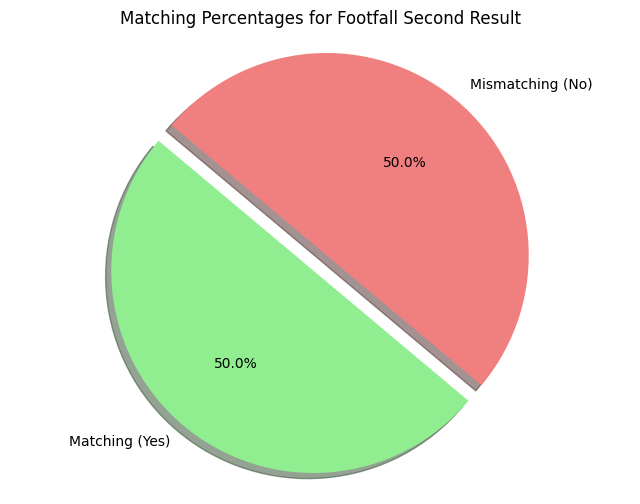

In [4]:
footfall_list = [
    {'Audio': 'Running Shoes', 'First': 'yes', 'Second': 'yes'},
    {'Audio': 'Barefoot', 'First': 'yes', 'Second': 'yes'},
    {'Audio': 'Sneakers', 'First': 'yes', 'Second': 'no'},
    {'Audio': 'Flip Flops', 'First': 'yes', 'Second': 'no'},
    {'Audio': 'Boots', 'First': 'yes', 'Second': 'yes'},
    {'Audio': 'Nathaniel Barefoot', 'First': 'yes', 'Second': 'no'}
]

footfall_list = pd.DataFrame(footfall_list)

# Calculate the matching percentage
matching_percentage = (footfall_list['Second'] == 'yes').sum() / len(footfall_list) * 100
mismatching_percentage = 100 - matching_percentage

# Create a pie chart for matching percentages
labels = ['Matching (Yes)', 'Mismatching (No)']
sizes = [matching_percentage, mismatching_percentage]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Matching)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Matching Percentages for Footfall Second Result')

plt.show()

In [5]:
run she {'Result 1': 1.0, 'Result 2': 0.07}
bare al {'Result 1': 1.0, 'Result 2': 0.03}
sneaker data = {'Result 1': 1.0, 'Result 2': 0.17}
flip = data = {'Result 1': 1.0, 'Result 2': 0.13}
boots {'Result 1': 1.0, 'Result 2': 0.02}
na bare {'Result 1': 1.0, 'Result 2': 0.18}

SyntaxError: invalid syntax (947814618.py, line 1)

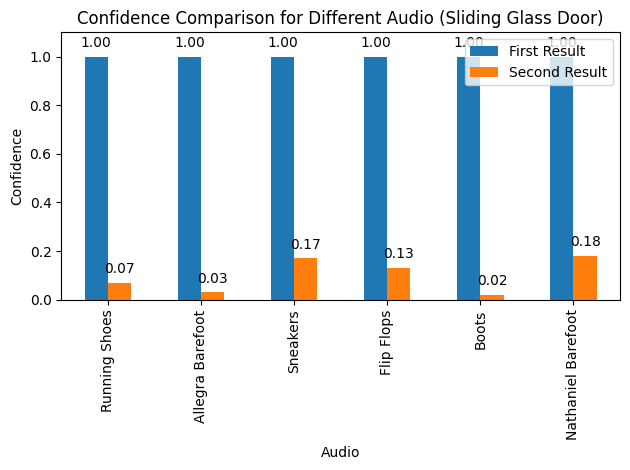

In [6]:
slidingglassdoor_confidence = [
    {'Audio': 'Running Shoes', 'First Result': '1.0', 'Second Result': '0.07'},
    {'Audio': 'Allegra Barefoot', 'First Result': '1.0', 'Second Result': '0.03'},
    {'Audio': 'Sneakers', 'First Result': '1.0', 'Second Result': '0.17'},
    {'Audio': 'Flip Flops', 'First Result': '1.0', 'Second Result': '0.13'},
    {'Audio': 'Boots', 'First Result': '1.0', 'Second Result': '0.02'},
    {'Audio': 'Nathaniel Barefoot', 'First Result': '1.0', 'Second Result': '0.18'}
]

slidingglassdoor_confidence = pd.DataFrame(slidingglassdoor_confidence)

# Convert the confidence columns to numeric
slidingglassdoor_confidence['First Result'] = pd.to_numeric(slidingglassdoor_confidence['First Result'])
slidingglassdoor_confidence['Second Result'] = pd.to_numeric(slidingglassdoor_confidence['Second Result'])

# Set the 'Audio' column as the index
slidingglassdoor_confidence.set_index('Audio', inplace=True)

# Create a bar chart
ax = slidingglassdoor_confidence.plot(kind='bar')
ax.set_ylabel('Confidence')
ax.set_title('Confidence Comparison for Different Audio (Footfall Data)')

# Adding confidence values above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.ylim(0, 1.1)

# Display the bar chart
plt.show()